In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

determine the five most common journals and the total articles for each. 

Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal 

In [2]:
welcome = pd.read_csv('WELLCOME/WELLCOME_APCspend2013_forThinkful.csv', encoding='latin-1') 
#changing the encoding so that it can recognize the pound (£).

welcome.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
#re-title for ease of use
data = welcome.rename(index=str, columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'})
data.head()

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
#I have found that there are a few $ signs in there. I need to find where they are. 
#replace them and make sure to use this index later to multiply by the currency rate.
dollar_index = np.where(data['Cost'].str.contains("$", regex=False))
#rid ourselves the the £ and $ signs
data['Cost'] = data['Cost'].replace({'\£': '', ',': ''}, regex=True)
data['Cost'] = data['Cost'].replace({'\$': '', ',': ''}, regex=True)
data['Cost'] = data['Cost'].astype(float) #Turn into floating point values for operations

In [5]:
conversion = data['Cost'][dollar_index[0]].values*0.79
#changing the values for those indeces from dollars to pounds. 
## note: ONLY RUN THIS ONCE!!! better way?
data['Cost'][dollar_index[0]] = conversion #reseting those values to the corrected vlaue

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#making it so that there are no weird naming inconsistencies like there were before 
#for example there was 'Plos one' and 'Plos One'.
data['Journal title'] = data['Journal title'].str.capitalize()

In [14]:
#answer to first question
journals = data.groupby('Journal title')['Article title'].count()
journals.nlargest(5)

Journal title
Plos one                           190
Journal of biological chemistry     53
Neuroimage                          29
Plos genetics                       24
Plos pathogens                      24
Name: Article title, dtype: int64

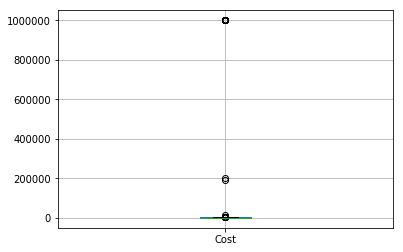

In [7]:
data.boxplot(column='Cost');
#obvious outliers in costs
#max value is 999999

In [9]:
high_val = data[data['Cost']<100000].max()

cost_index = np.where(data['Cost']> 10000)
data['Cost'].iloc[cost_index] = high_val
#only run this cell once.. changing the data so that the highest values are replaced with more reasonable high values.

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
article_per_journal = data.groupby(['Journal title', 'Article title']).mean()
article_per_journal

Cost
Journal title                                      Article title                                              
Academy of nutrition and dietetics                 Parent support and parent mediated behaviours a...  2379.54
Acs chemical biology                               A Novel Allosteric Inhibitor of the Uridine Dip...  1294.59
                                                   Chemical proteomic analysis reveals the drugabi...  1294.78
                                                   Discovery of ?2 Adrenergic Receptor Ligands Usi...   947.07
                                                   Discovery of an allosteric inhibitor binding si...  1267.76
                                                   Synthesis of alpha-glucan in mycobacteria invol...  2286.73
Acs chemical neuroscience                          Continuous online microdialysis using microflui...  1186.80
Acs nano                                           HYDROXY-TERMINATED CONJUGATED POLYMER NANOPARTI...   642.89
                                                   Skin dendritic cell targeting via microneedle a...   693.39
Acta crystallographica section d,  biological c... Clustering procedures for the optimal selection...   771.42
Acta crystallographica section d: biological cr... Intensity statistics in the presence of transla...   773.74
Acta crystallographica section f: structural bi... Structure of Pseudomonas aeruginosa inosine 5'-...   807.67
                                                   Structure of diaminohydroxyphosphoribosylaminop...   785.60
Acta crystallographica, section d                  Nearest-cell: a fast and easy tool for locating...   757.18
Acta crystallography d                             Crystallization, dehydration and experimental p...   774.19
Acta d                                             Structure of HLA-A*0301 in complex with a pepti...   750.16
Acta dermato venereologica                         The Importance of a Full Clinical Examination: ...   653.96
Acta diabetologica                                 A rare SNP in pre-miR-34a is associated with in...  2336.28
Acta f                                             Crystallization and preliminary crystallographi...   754.90
Acta neuropathol                                   Overexpression of human wild-type FUS causes pr...  1901.04
Acta neuropathologica                              Insufficient OPC migration into demyelinated le...  2250.97
                                                   Unravelling the enigma o selective vulnerabilit...  2348.21
                                                   Î±-Synucleinopathy associated with G51D SNCA mu...  1884.01
Acta opthalmologica                                Visual and psychological morbidity among patien...  2270.16
Acta physiol                                       Integration of transient receptor potential can...  1991.50
Addiction                                          Acute alcohol-related dysfunction as a predicto...  1919.51
                                                   Childhood conduct disorder trajectories, prior ...  2352.94
Advances in experimental medicine and biology      Modelling Cerebrovascular Reactivity: A Novel N...  1928.46
                                                   Normobaric hyperoxia does not change optical sc...  1928.46
                                                   Oscillations in cerebral haemodynamics in patie...  1928.46
...                                                                                                        ...
Tropical animal health & production                Low prevalence of bovine tuberculosis in Somali...  2054.78
Tropical medicine and international health         Disengagement from care in a decentralised prim...  1836.92
                                                   Epidemiology and control of trachoma: systamati...  1974.72
                                                   Maternal recall of birth weight and birth size ...  1896.93

In [12]:
#answer to second question
article_per_journal['Cost'].describe()

count    2076.000000
mean     1820.632711
std       768.742443
min         0.000000
25%      1260.260000
50%      1851.220000
75%      2302.330000
max      6000.000000
Name: Cost, dtype: float64